# **Analyzing Movie Data through Python**

# ** Importing Our Modules**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing Our Data Sets**
Below we are importing the data sets we will use into our Jupyter Notebook

## **Importing Our TN Movie Budgets CSV File**

Below we are importing our TN Movie Budget data set using pandas in a similar fashion to our IMDB CSV file.

In [3]:
tn_df = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 1/Phase_1_Project/Exploratory-Data-Analysis-Using-Movie-Data/seamus/Movie Project Data/tn.movie_budgets.csv')
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


## **Some more cleaning**

First up, after seeing the new df3 table above, we can see that the 'production_budget', 'domestic_gross', and 'worldwide_gross' columns are listed as strings. Since we can't use strings to visualize data, we will clean them below by removing punctation and converting them from strings to integers

In [4]:
tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '')
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '')
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$', '')
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace('$', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '')

In [5]:
tn_df = tn_df.astype({'production_budget':'int'})
tn_df = tn_df.astype({'domestic_gross':'int'})
tn_df = tn_df.astype({'worldwide_gross':'int'})

We also want to update the release date column into a datetime type so we can more easily use it.

In [6]:
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'], infer_datetime_format=True)

### **Return on Investment:**
Below we are creating a new column titled "Return on Investment" (ROI) so we can measure the return on investment on different types of films. Additionally, we are cleaning up our new column and dataframe by removing rows where ROI is 0. Given that this table is telling us that ROI is "0" might tell us that this data is wrong.

In [7]:
tn_df['return_on_investment'] = (tn_df['worldwide_gross']/tn_df['production_budget'])*100

In [8]:
# Removing ROI values that are $0.
tn_df = tn_df[tn_df['return_on_investment'] != 0]

### **Release Month**
We're also creating a "Release Month" column so we can measure across the time of the year

In [9]:
tn_df['release_month'] = pd.DatetimeIndex(tn_df['release_date']).month
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,653.257713,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,254.667286,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,42.789243,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,424.384139,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,415.369636,12
...,...,...,...,...,...,...,...,...
5775,76,2006-05-26,Cavite,7000,70071,71644,1023.485714,5
5776,77,2004-12-31,The Mongol King,7000,900,900,12.857143,12
5778,79,1999-04-02,Following,6000,48482,240495,4008.250000,4
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,26.760000,7


Now we can see how return on investment differs across months of the year

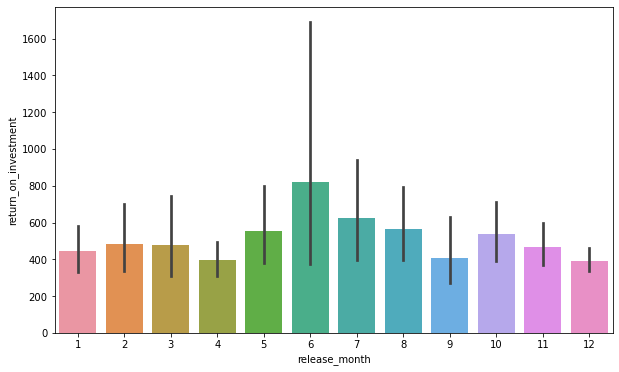

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a bar chart on the first axis
sns.barplot(x="release_month", y="return_on_investment", data=tn_df)

plt.show()

It looks like July is the best month to release a movie based on ROI. However, there is a HUGE confidence interval. Let's see if we control for some outliers if it is still a good month for releases.

Below, we are creating a new column, "clean_roi", that has values that fall within the inter quartile range (IQR) of our return_on_investment column.

In [11]:
q1 = tn_df['return_on_investment'].quantile(0.25)
q3 = tn_df['return_on_investment'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Create a new column that contains only the non-outlier values
tn_df['clean_roi'] = tn_df.loc[(tn_df['return_on_investment'] >= lower_bound) & (tn_df['return_on_investment'] <= upper_bound), 'return_on_investment']
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,release_month,clean_roi
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,653.257713,12,653.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,254.667286,5,254.667286
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,42.789243,6,42.789243
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,424.384139,5,424.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,415.369636,12,415.369636


Now let's see if July is still a good month for a release, based on ROI.

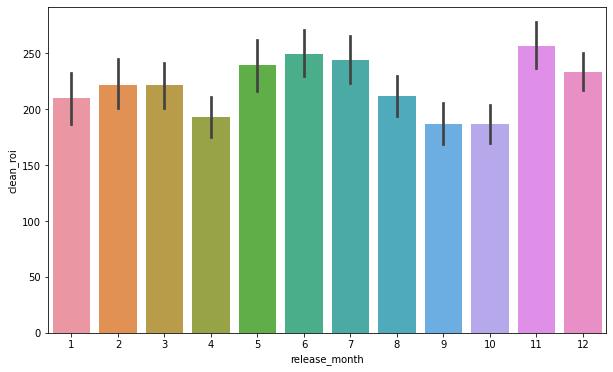

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a bar chart on the first axis
sns.barplot(x="release_month", y="clean_roi", data=tn_df)

plt.show()

Looks like it's not the miracle we thought, but it still presents better ROI versus other months, with the potential for a "jackpot", considering the outliers in our other data.

Below is another look that includes a point plot.

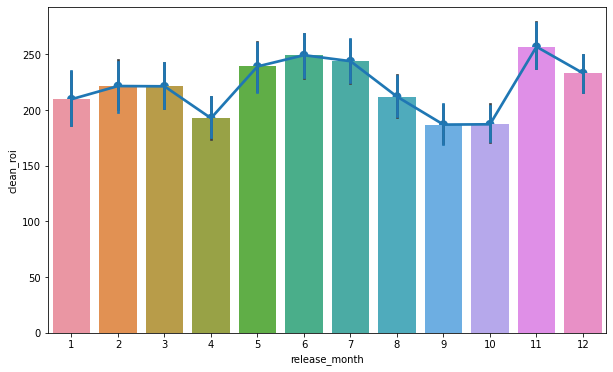

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a bar chart on the first axis
sns.barplot(x="release_month", y="clean_roi", data=tn_df)

sns.pointplot(x="release_month", y="clean_roi", data=tn_df)

plt.show()

Although the outlier controlled data doesn't tell quite the same story for June, it still appears that something is going on. Let's try and single out June and what other variables are in play.

Lets start by adding another data set that includes "genres" and see if genre is creating these affects.

In [19]:
import sqlite3
conn = sqlite3.connect('/Users/seamuswalsh/Flatiron/Course Materials/Phase 1/Phase_1_Project/Exploratory-Data-Analysis-Using-Movie-Data/seamus/Movie Project Data/im.db') 
c = conn.cursor()

In [20]:
c.execute('''
          SELECT
          *
          FROM movie_basics
          
          ''')

imdb_sql_df = pd.DataFrame(c.fetchall(), columns = ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres'])
imdb_sql_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [86]:
genre_df = pd.merge(tn_df, imdb_sql_df, left_on = 'movie', right_on = 'primary_title')
genre_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,release_month,clean_roi,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,653.257713,12,653.257713,tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,254.667286,5,254.667286,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,42.789243,6,42.789243,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,424.384139,5,424.384139,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,682.711400,4,682.711400,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,67,2006-04-28,Clean,10000,138711,138711,1387.110000,4,NaN,tt6619196,Clean,Clean,2017,70.0,"Comedy,Drama,Horror"
3441,68,2001-07-06,Cure,10000,94596,94596,945.960000,7,NaN,tt1872026,Cure,Cure,2011,93.0,Drama
3442,68,2001-07-06,Cure,10000,94596,94596,945.960000,7,NaN,tt5936960,Cure,Cure,2014,NaN,None
3443,70,1996-04-01,Bang,10000,527,527,5.270000,4,5.270000,tt6616538,Bang,Bang,2015,NaN,None


In [50]:
genre_df_new = genre_df.explode('genres')
genre_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3445 entries, 0 to 3444
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3445 non-null   int64         
 1   release_date          3445 non-null   datetime64[ns]
 2   movie                 3445 non-null   object        
 3   production_budget     3445 non-null   int64         
 4   domestic_gross        3445 non-null   int64         
 5   worldwide_gross       3445 non-null   int64         
 6   return_on_investment  3445 non-null   float64       
 7   release_month         3445 non-null   int64         
 8   clean_roi             3125 non-null   float64       
 9   movie_id              3445 non-null   object        
 10  primary_title         3445 non-null   object        
 11  original_title        3444 non-null   object        
 12  start_year            3445 non-null   int64         
 13  runtime_minutes   

In [93]:
genre_df_june = genre_df[genre_df['release_month'] == 6]

genre_df_june.loc[:,'genres'] = genre_df_june['genres'].str.strip().str.split(",")

/Users/seamuswalsh/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [95]:
exploded_genre_df_june = genre_df_june.explode('genres')

In [96]:
exploded_genre_df_june

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,release_month,clean_roi,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,42.789243,6,42.789243,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Action
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,42.789243,6,42.789243,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Adventure
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,42.789243,6,42.789243,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Sci-Fi
21,29,2013-06-14,Man of Steel,225000000,291045518,667999518,296.888675,6,296.888675,tt0770828,Man of Steel,Man of Steel,2013,143.0,Action
21,29,2013-06-14,Man of Steel,225000000,291045518,667999518,296.888675,6,296.888675,tt0770828,Man of Steel,Man of Steel,2013,143.0,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,2575.494167,6,NaN,tt1742336,Your Sister's Sister,Your Sister's Sister,2011,90.0,Comedy
3418,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,2575.494167,6,NaN,tt1742336,Your Sister's Sister,Your Sister's Sister,2011,90.0,Drama
3422,90,2014-06-19,The Past is a Grotesque Animal,100000,20056,20056,20.056000,6,20.056000,tt3072636,The Past is a Grotesque Animal,The Past is a Grotesque Animal,2014,77.0,Biography
3422,90,2014-06-19,The Past is a Grotesque Animal,100000,20056,20056,20.056000,6,20.056000,tt3072636,The Past is a Grotesque Animal,The Past is a Grotesque Animal,2014,77.0,Documentary


In [97]:
exploded_genre_df_june.groupby(['genres'])

genres
Action         253.765337
Adventure      319.034739
Animation      348.278897
Biography      115.449938
Comedy         471.916082
Crime          203.947973
Documentary    287.377848
Drama          507.558509
Family         361.569131
Fantasy        432.842770
History        169.032597
Horror         723.330059
Music          232.675892
Musical        103.461266
Mystery        244.507559
News                  NaN
Romance        568.927073
Sci-Fi         234.779994
Sport          215.103440
Thriller       612.026668
War            965.296748
Name: return_on_investment, dtype: float64